In [ ]:
import pandas as pd
%matplotlib inline

In [ ]:
compras_df = pd.read_csv('/work/clean_compras.csv')

In [ ]:
compras_df.head(5)

,0
0,"COMPUMARK, S.A. DE C.V."
1,"ALMACEN PAPELERO SALDAÑA, S.A. DE C.V."
2,"PLOMIFERRETERA EL TORNILLO, S.A. DE C.V."
3,"MISODI PUBLICIDAD,S.A.DE C.V."
4,"IMPULSORA DE RENTAS Y SERVICIOS, S.A. DE C.V."


# Visión General del Dataset

In [ ]:
compras_df.columns

Index(['0'], dtype='object')

In [ ]:
compras_df.dtypes

0    object
dtype: object

In [ ]:
compras_df.describe()

,0
count,533
unique,533
top,"CKT EDIFICACIONES, SA. DE CV."
freq,1


In [ ]:
compras_df = compras_df[['BENEFICIARIO', 'FACTURAS', 'CONTRATO', 'CONCEPTO', 'TIPO', 'FDO-#OP', 'FECHA', 'IMPORTE', 'SHEET']]

KeyError: "None of [Index(['BENEFICIARIO', 'FACTURAS', 'CONTRATO', 'CONCEPTO', 'TIPO', 'FDO-#OP',\n       'FECHA', 'IMPORTE', 'SHEET'],\n      dtype='object')] are in the [columns]"

## Análisis Unidimensional de las Variables

In [ ]:
compras_df['SHEET'].value_counts()

OBRA PUBLICA Y GV FDOS. ESP    579
GASTOS VARIOS                  507
SERV PERS                      303
COMUNIC                        117
SERV PROV                       58
Name: SHEET, dtype: int64

In [ ]:
len(compras_df['CONCEPTO'].value_counts())

1443

In [ ]:
compras_df['BENEFICIARIO'].value_counts()[0:10]

CAR ONE MONTERREY, S.A. DE C.V.                          56
INTERASFALTOS, S.A. DE C.V.                              49
CAMARA MEXICANA DE LA INDUSTRIA DE LA CONSTRUCCION       44
HISA FARMACEUTICA, S.A. DE C.V.                          40
GRUPO COYOTE MONTERREY, S.A. DE C.V.                     38
GARCIA ZAVALA EDGAR ALEJANDRO JOBERAGAN                  37
EDITORA EL SOL, S.A. DE C.V.                             36
CAR ONE AMERICANA,S.A.DE C.V.                            31
PUBLICIDAD Y COMERCIALIZADORA DEL NORTE, S.A. DE C.V.    24
CFE SUMINISTRADOR DE SERVICIOS BASICOS                   24
Name: BENEFICIARIO, dtype: int64

<AxesSubplot:>

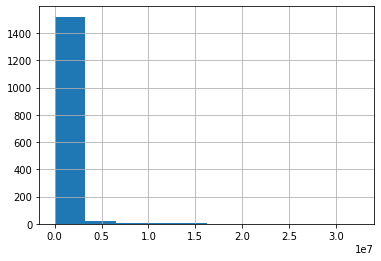

In [ ]:
compras_df['IMPORTE'].hist()

<AxesSubplot:>

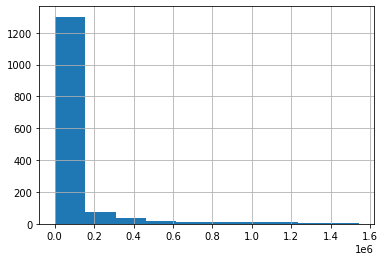

In [ ]:
compras_df[compras_df['IMPORTE']< compras_df['IMPORTE'].quantile(0.95)]['IMPORTE'].hist()

<AxesSubplot:>

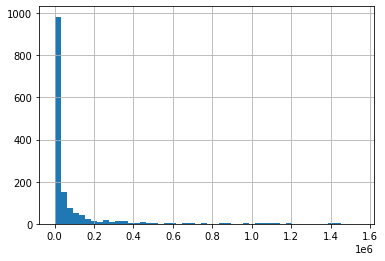

In [ ]:
compras_df[compras_df['IMPORTE']< compras_df['IMPORTE'].quantile(0.95)]['IMPORTE'].hist(bins=50)

In [ ]:
compras_df[compras_df['IMPORTE']< compras_df['IMPORTE'].quantile(0.95)].head(5)

,BENEFICIARIO,FACTURAS,CONTRATO,CONCEPTO,TIPO,FDO-#OP,FECHA,IMPORTE,SHEET
0,"COMPUMARK, S.A. DE C.V.",A60360-183011-2283,ORDEN DE COMPRA 8020,"SUMINISTRO DE REQUERIMIENTOS PARA EL EVENTO ""D...",TR,1022838.0,2022-06-17,885080.00,GASTOS VARIOS
1,"ALMACEN PAPELERO SALDAÑA, S.A. DE C.V.",MTY7291-183011-2249,ORDEN DE COMPRA 7804,SUMINISTRO DE MATERIALES PARA LOS CENTROS DE B...,TR,1022770.0,2022-06-10,52854.24,GASTOS VARIOS
2,"ALMACEN PAPELERO SALDAÑA, S.A. DE C.V.",MTY7274-183011-2226,ORDEN DE COMPRA 7840,"SUMINISTRO DE PAPEL AUTOCOPIA, SECRETARIA DE S...",TR,1022770.0,2022-06-10,28596.32,GASTOS VARIOS
3,"ALMACEN PAPELERO SALDAÑA, S.A. DE C.V.",MTY7153-183011-1776,ORDEN DE COMPRA 7556,SUMINISTRO DE PIZARRON DE CORCHO PARA LA DIREC...,TR,1022770.0,2022-06-10,3781.60,GASTOS VARIOS
4,"ALMACEN PAPELERO SALDAÑA, S.A. DE C.V.",MTY7250-183011-1971,ORDEN DE COMPRA 7805,SUMINISTRO DE TRITURADORA DE PAPEL Y PINTARRON...,TR,1022815.0,2022-06-17,2872.10,GASTOS VARIOS


## Análisis Multidimensional de las Variables

In [ ]:
sum_importe_benef = compras_df.groupby('BENEFICIARIO').sum()['IMPORTE']

<AxesSubplot:xlabel='BENEFICIARIO'>

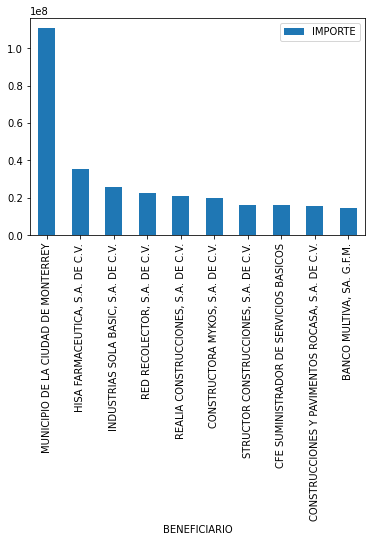

In [ ]:
sum_importe_benef.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10].plot(kind='bar', x='BENEFICIARIO', y='IMPORTE')

In [ ]:
mean_importe_sheet = compras_df.groupby('SHEET').mean()['IMPORTE']

<AxesSubplot:xlabel='SHEET'>

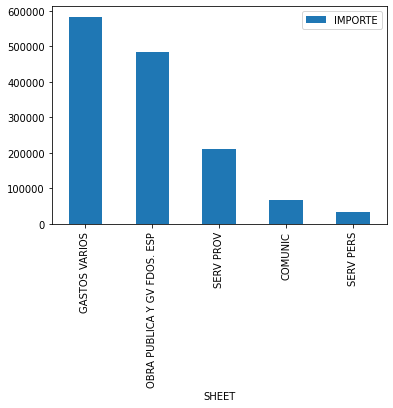

In [ ]:
mean_importe_sheet.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10].plot(kind='bar', x='SHEET', y='IMPORTE')

In [ ]:
mean_importe_sheet.reset_index().sort_values(by='IMPORTE', ascending=False).iloc[0:10]

,SHEET,IMPORTE
1,GASTOS VARIOS,583159.370513
2,OBRA PUBLICA Y GV FDOS. ESP,484493.743558
4,SERV PROV,210406.068793
0,COMUNIC,67248.102051
3,SERV PERS,33521.136634


In [ ]:
sum_importe_fecha = compras_df.groupby('FECHA').sum()['IMPORTE']
sum_importe_fecha

FECHA
2022-06-01    4.004693e+04
2022-06-02    1.314509e+06
2022-06-03    1.058734e+08
2022-06-06    5.371706e+04
2022-06-07    1.951747e+05
2022-06-08    2.299133e+06
2022-06-09    4.560466e+05
2022-06-10    1.579913e+08
2022-06-13    2.750020e+05
2022-06-14    1.858322e+07
2022-06-15    2.029386e+07
2022-06-16    6.751660e+06
2022-06-17    6.366866e+07
2022-06-20    1.084966e+06
2022-06-21    1.936510e+04
2022-06-22    2.069795e+07
2022-06-23    7.289177e+07
2022-06-24    5.869975e+07
2022-06-27    1.074897e+06
2022-06-29    7.445967e+06
2022-06-30    6.670179e+07
Name: IMPORTE, dtype: float64

In [ ]:
compras_gastos_df = compras_df[compras_df['SHEET'] == 'GASTOS VARIOS']

<AxesSubplot:>

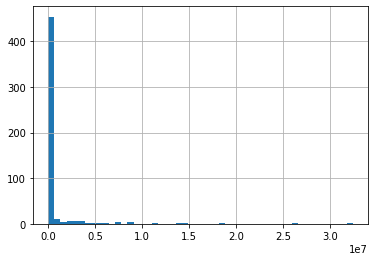

In [ ]:
compras_gastos_df['IMPORTE'].hist(bins=50)

In [ ]:
compras_gastos_df[compras_gastos_df['BENEFICIARIO'] == 'MUNICIPIO DE LA CIUDAD DE MONTERREY']

,BENEFICIARIO,FACTURAS,CONTRATO,CONCEPTO,TIPO,FDO-#OP,FECHA,IMPORTE,SHEET
196,MUNICIPIO DE LA CIUDAD DE MONTERREY,SDE/33/2022-183009-247,NO APLICA,PROGRAMA EMPLEO TEMPORAL AHORA TRABAJAMOS JUNT...,TR,343000002.0,2022-06-16,124536.00,GASTOS VARIOS
197,MUNICIPIO DE LA CIUDAD DE MONTERREY,2022-11-A-183010-1672,NO APLICA,"PAGO DE NÓMINA PERIODO: 11-2022, BANCO: BANCA ...",TR,11000252.0,2022-06-23,32447591.98,GASTOS VARIOS
198,MUNICIPIO DE LA CIUDAD DE MONTERREY,2022-11-C-183010-1671,NO APLICA,"PAGO DE NÓMINA PERIODO: 11-2022, BANCO: BANCO ...",TR,240000179.0,2022-06-23,2838726.90,GASTOS VARIOS
199,MUNICIPIO DE LA CIUDAD DE MONTERREY,2022-11-B-183010-1674,NO APLICA,"PAGO DE NÓMINA PERIODO: 11-2022, BANCO: BANCO ...",TR,231000159.0,2022-06-23,18267383.32,GASTOS VARIOS
200,MUNICIPIO DE LA CIUDAD DE MONTERREY,2022-11-BBVA-183010-1673,NO APLICA,"PAGO DE NÓMINA PERIODO: 11-2022, BANCO: BBVA B...",TR,328000022.0,2022-06-23,6155023.82,GASTOS VARIOS
201,MUNICIPIO DE LA CIUDAD DE MONTERREY,SDE/354/2022-183009-282,NO APLICA,PROGRAMA EMPLEO TEMPORAL AHORA TRABAJAMOS JUNT...,TR,343000003.0,2022-06-29,119347.00,GASTOS VARIOS
202,MUNICIPIO DE LA CIUDAD DE MONTERREY,2022-12-A-183010-1827,NO APLICA,"PAGO DE NÓMINA PERIODO: 12-2022, BANCO: BANCA ...",TR,11000253.0,2022-06-30,26291231.21,GASTOS VARIOS
203,MUNICIPIO DE LA CIUDAD DE MONTERREY,2022-12-C-183010-1826,NO APLICA,"PAGO DE NÓMINA PERIODO: 12-2022, BANCO: BANCO ...",TR,240000180.0,2022-06-30,3640632.24,GASTOS VARIOS
204,MUNICIPIO DE LA CIUDAD DE MONTERREY,2022-12-B-183010-1829,NO APLICA,"PAGO DE NÓMINA PERIODO: 12-2022, BANCO: BANCO ...",TR,231000160.0,2022-06-30,14808118.15,GASTOS VARIOS
205,MUNICIPIO DE LA CIUDAD DE MONTERREY,2022-12-BBVA-183010-1828,NO APLICA,"PAGO DE NÓMINA PERIODO: 12-2022, BANCO: BBVA B...",TR,328000023.0,2022-06-30,5853328.72,GASTOS VARIOS


In [ ]:
compras_df[compras_df['BENEFICIARIO'] == 'MUNICIPIO DE LA CIUDAD DE MONTERREY']['SHEET'].value_counts()

GASTOS VARIOS    14
Name: SHEET, dtype: int64

In [ ]:
compras_sheet_benef = compras_df.groupby(['BENEFICIARIO', 'SHEET']).sum()['IMPORTE'].sort_values().unstack('SHEET')

In [ ]:
top_benef = compras_df.groupby('BENEFICIARIO')['IMPORTE'].sum().sort_values(ascending=False).index[0:10]

<AxesSubplot:xlabel='BENEFICIARIO'>

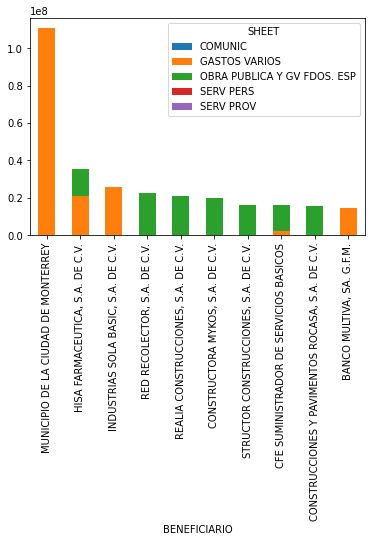

In [ ]:
compras_sheet_benef.loc[top_benef].plot.bar(stacked=True)

## Análisis de Texto

In [ ]:
import nltk
from nltk.corpus import stopwords


In [ ]:
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
print(stopwords.words('spanish'))

['de', 'la', 'que', 'el', 'en', 'y', 'a', 'los', 'del', 'se', 'las', 'por', 'un', 'para', 'con', 'no', 'una', 'su', 'al', 'lo', 'como', 'más', 'pero', 'sus', 'le', 'ya', 'o', 'este', 'sí', 'porque', 'esta', 'entre', 'cuando', 'muy', 'sin', 'sobre', 'también', 'me', 'hasta', 'hay', 'donde', 'quien', 'desde', 'todo', 'nos', 'durante', 'todos', 'uno', 'les', 'ni', 'contra', 'otros', 'ese', 'eso', 'ante', 'ellos', 'e', 'esto', 'mí', 'antes', 'algunos', 'qué', 'unos', 'yo', 'otro', 'otras', 'otra', 'él', 'tanto', 'esa', 'estos', 'mucho', 'quienes', 'nada', 'muchos', 'cual', 'poco', 'ella', 'estar', 'estas', 'algunas', 'algo', 'nosotros', 'mi', 'mis', 'tú', 'te', 'ti', 'tu', 'tus', 'ellas', 'nosotras', 'vosotros', 'vosotras', 'os', 'mío', 'mía', 'míos', 'mías', 'tuyo', 'tuya', 'tuyos', 'tuyas', 'suyo', 'suya', 'suyos', 'suyas', 'nuestro', 'nuestra', 'nuestros', 'nuestras', 'vuestro', 'vuestra', 'vuestros', 'vuestras', 'esos', 'esas', 'estoy', 'estás', 'está', 'estamos', 'estáis', 'están', 'e

In [ ]:
textos_compras = ''
for row in compras_df['CONCEPTO']:
    textos_compras = textos_compras + ' ' + row


In [ ]:
stopwords_list = stopwords.words('spanish') + ['2021', 'cont', 'millar', 'dpp', 'est', 'op', 'ret', 'mty', 'icom']

In [ ]:
textos_compras = ' '.join([x for x in textos_compras.strip().lower().split(' ') if x not in stopwords_list and len(x)>4])

In [ ]:
!pip install wordcloud

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 458.6/458.6 KB 39.4 MB/s eta 0:00:00
You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

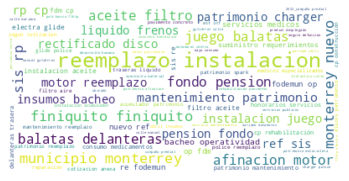

In [ ]:
wc = WordCloud(background_color='white')
wc.generate(textos_compras)

plt.axis('off')
plt.imshow(wc, interpolation='bilinear')
plt.show()

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=6853f152-0228-4c63-98bd-f29aa5103223' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>